<a href="https://colab.research.google.com/github/Roberto0611/ChestX-ray/blob/main/pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Made by: Roberto Ochoa Cuevas :)

In [3]:
# Unzip files ( Just if you are using google collab or any linux interpreter)
!unzip pneumonia/pneuomonia.zip -d pneumonia

Archive:  pneumonia/pneuomonia.zip
  inflating: pneumonia/person1_bacteria_1.jpeg  
  inflating: pneumonia/person1_bacteria_2.jpeg  
  inflating: pneumonia/person1_virus_11.jpeg  
  inflating: pneumonia/person1_virus_12.jpeg  
  inflating: pneumonia/person1_virus_13.jpeg  
  inflating: pneumonia/person1_virus_6.jpeg  
  inflating: pneumonia/person1_virus_7.jpeg  
  inflating: pneumonia/person1_virus_8.jpeg  
  inflating: pneumonia/person1_virus_9.jpeg  
  inflating: pneumonia/person10_bacteria_43.jpeg  
  inflating: pneumonia/person10_virus_35.jpeg  
  inflating: pneumonia/person100_bacteria_475.jpeg  
  inflating: pneumonia/person100_bacteria_477.jpeg  
  inflating: pneumonia/person100_bacteria_478.jpeg  
  inflating: pneumonia/person100_bacteria_479.jpeg  
  inflating: pneumonia/person100_bacteria_480.jpeg  
  inflating: pneumonia/person100_bacteria_481.jpeg  
  inflating: pneumonia/person100_bacteria_482.jpeg  
  inflating: pneumonia/person100_virus_184.jpeg  
  inflating: pneumonia

In [4]:
!unzip normal/normal.zip -d normal

Archive:  normal/normal.zip
  inflating: normal/IM-0001-0001.jpeg  
  inflating: normal/IM-0003-0001.jpeg  
  inflating: normal/IM-0005-0001.jpeg  
  inflating: normal/IM-0006-0001.jpeg  
  inflating: normal/IM-0007-0001.jpeg  
  inflating: normal/IM-0009-0001.jpeg  
  inflating: normal/IM-0010-0001.jpeg  
  inflating: normal/IM-0011-0001.jpeg  
  inflating: normal/IM-0011-0001-0001.jpeg  
  inflating: normal/IM-0011-0001-0002.jpeg  
  inflating: normal/IM-0013-0001.jpeg  
  inflating: normal/IM-0015-0001.jpeg  
  inflating: normal/IM-0016-0001.jpeg  
  inflating: normal/IM-0017-0001.jpeg  
  inflating: normal/IM-0019-0001.jpeg  
  inflating: normal/IM-0021-0001.jpeg  
  inflating: normal/IM-0022-0001.jpeg  
  inflating: normal/IM-0023-0001.jpeg  
  inflating: normal/IM-0025-0001.jpeg  
  inflating: normal/IM-0027-0001.jpeg  
  inflating: normal/IM-0028-0001.jpeg  
  inflating: normal/IM-0029-0001.jpeg  
  inflating: normal/IM-0030-0001.jpeg  
  inflating: normal/IM-0031-0001.jpeg  
  

In [5]:
# Delete the .zip files
!rm -rf normal/normal.zip
!rm -rf pneumonia/pneuomonia.zip

In [6]:
# make a data set folder
!mkdir dataset
!cp -r normal dataset/normal
!cp -r pneumonia dataset/pneumonia

In [7]:
# Modify a little bit the images

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# DataSet Generator
datagen = ImageDataGenerator(
  rescale = 1. / 255, # Normalize images
   validation_split = 0.2 # % of images for testing
)

data_gen_entrenamiento = datagen.flow_from_directory("/content/dataset",
                                                     target_size=(224,224),
                                                     batch_size=32,shuffle=True,
                                                     subset="training")

data_gen_pruebas = datagen.flow_from_directory("/content/dataset",
                                                     target_size=(224,224),
                                                     batch_size=32,shuffle=True,
                                                     subset="validation")

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


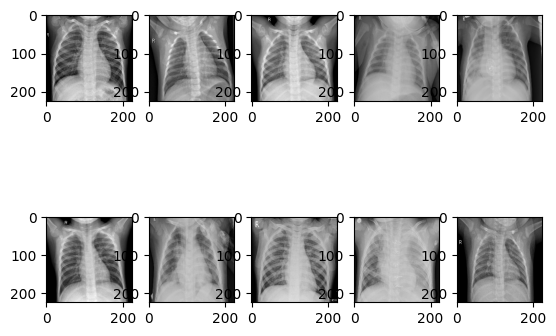

In [8]:
# Show some of our images

import matplotlib.pyplot as plt

for imagenes, etiquetas in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5, i+1)
    plt.imshow(imagenes[i])

  break

plt.show()

In [14]:
# Create the model

import tensorflow as tf

# Define the model
modelo = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32,(3,3), input_shape=(224,224,3), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(32,(3,3), input_shape=(224,224,3), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=100, activation="relu"),
  tf.keras.layers.Dense(2, activation='softmax')
])

In [15]:
# Compile the model
modelo.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics = ["accuracy"]
)

In [16]:
EPOCAS = 20
entrenamiento = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS,batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 0.6361 - loss: 1.3386 - val_accuracy: 0.8200 - val_loss: 0.4169
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.9427 - loss: 0.2073 - val_accuracy: 0.8150 - val_loss: 0.4454
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.9724 - loss: 0.0856 - val_accuracy: 0.8000 - val_loss: 0.6169
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.9913 - loss: 0.0306 - val_accuracy: 0.7650 - val_loss: 0.7372
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.9967 - loss: 0.0179 - val_accuracy: 0.8050 - val_loss: 0.6695
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.9924 - loss: 0.0159 - val_accuracy: 0.8550 - val_loss: 0.5170
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.9954 - loss: 0.0140 - val_accuracy: 0.7850 - val_loss: 0.7787
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.9981 - loss: 0.0072 - val_accuracy: 0.7300 - val_loss: 1.4562
Epo

In [17]:
# Function to test with any image
from PIL import Image
import cv2

def categorizar(ruta):
  img = Image.open(ruta)
  img = img.convert("RGB")
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1,224,224,3))
  return np.argmax(prediccion[0], axis = -1)

In [18]:
# Function to convert 0 to normal and 1 to pneumonia

def prediction(file):
  ruta = file
  prediccion = categorizar(ruta)

  if prediccion == 0:
    return "Normal"
  else:
    return "Pneumony"


0 equals normal, 1 equals pneumonia
